# Polinomial regression (Bias-variation)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Import necessary libraries: NumPy for numerical computations, Matplotlib for plotting, scikit-learn for machine learning functionalities such as Linear Regression, Mean Squared Error, and train-test splitting.



In [3]:
# Generate some data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 1)
y = 2*X[:,0] + np.random.randn(n_samples)

Generate random data for a regression problem with 100 samples. X is a 2D array of shape (n_samples, 1) and y is a 1D array of shape (n_samples,) representing the target values. The relationship between X and y is y = 2*X + noise, where the noise is drawn from a Gaussian distribution with mean 0 and variance 1.

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the dataset into training and test sets. The train_test_split function from scikit-learn is used to split the dataset into 80% training data and 20% test data.

In [21]:
# Define a list of polynomial degrees to try
degrees = range(1, 11)

Define a list of polynomial degrees to try, ranging from 1 to 10.



In [27]:
# Calculate the bias and variance for each polynomial degree
train_errors = []
test_errors = []
bias_squared = []
variances = []
for degree in degrees:
    # Fit a polynomial regression model
    model = LinearRegression()
    model.fit(np.vander(X_train[:,0], degree+1), y_train)
    # Calculate the training error
    y_train_pred = model.predict(np.vander(X_train[:,0], degree+1))
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    # Calculate the test error
    y_test_pred = model.predict(np.vander(X_test[:,0], degree+1))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    # Calculate the bias^2 and variance
    y_pred = model.predict(np.vander(X[:,0], degree+1))
    bias_squared.append(np.mean((y - y_pred)**2))
    variances.append(np.var(y_pred))
    
    
    
    
    
    
    

Loop over each polynomial degree, fit a polynomial regression model using LinearRegression from scikit-learn, and calculate the bias and variance.

In [23]:
# Calculate the training error
y_train_pred = model.predict(np.vander(X_train[:,0], degree+1))
train_errors.append(mean_squared_error(y_train, y_train_pred))
    
# Calculate the test error
y_test_pred = model.predict(np.vander(X_test[:,0], degree+1))
test_errors.append(mean_squared_error(y_test, y_test_pred))

Calculate the Mean Squared Error (MSE) for the training and test sets using the predict function of the trained model and mean_squared_error function from scikit-learn.

In [24]:
# Calculate the bias^2 and variance
y_pred = model.predict(np.vander(X[:,0], degree+1))
bias_squared.append(np.mean((y - y_pred)**2))
variances.append(np.var(y_pred))
    

Calculate the squared bias and variance of the model by using the prediction of the trained model on the entire dataset.

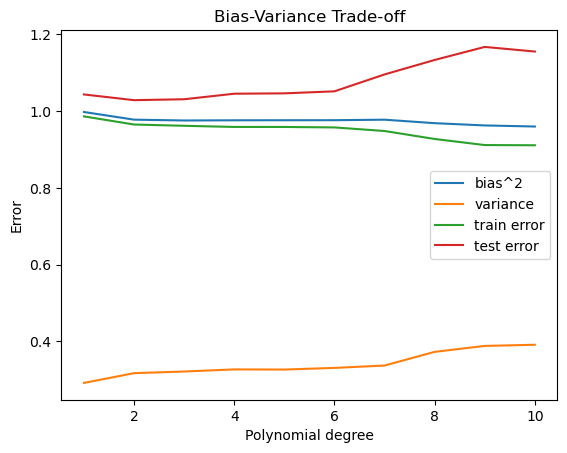

In [28]:
    
# Plot the bias-variance trade-off curve
plt.plot(degrees, bias_squared, label='bias^2')
plt.plot(degrees, variances, label='variance')
plt.plot(degrees, train_errors, label='train error')
plt.plot(degrees, test_errors, label='test error')
plt.legend(loc='best')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.show()





